In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# 设置随机数种子
np.random.seed(42)

# 加载数据
iris = load_iris()
X, y = iris.data, iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# 定义PCA降维，以便于可视化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# PCA降维
pca = PCA(n_components=2)  # 保留2个主成分（因为平面散点图只有两个坐标轴）
pca = pca.fit(X_scaled)

### K-means实现

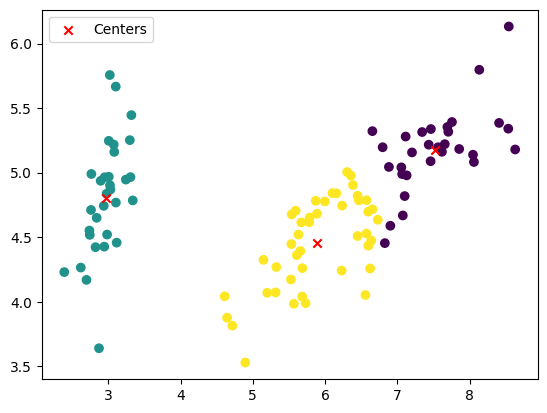

In [4]:
# 创建 KMeans 对象，设定簇的数量为 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# 使用 K-means 进行聚类
kmeans.fit(X_train)

# 降维+可视化
cluster_points = pca.transform(X_train)
centroids_points = pca.transform(kmeans.cluster_centers_)

plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(centroids_points[:, 0], centroids_points[:, 1], marker='x', c='red', label='Centers')
plt.legend()
plt.show()

In [5]:
# 聚类中心
kmeans.cluster_centers_

array([[6.82      , 3.09333333, 5.68666667, 2.03333333],
       [4.96451613, 3.37741935, 1.46451613, 0.2483871 ],
       [5.79545455, 2.69318182, 4.32727273, 1.39545455]])

In [6]:
# 测试样例数据
example_train = np.array([
    [5.1, 3.5, 1.4, 0.2],
    [5.0, 3.6, 1.4, 0.2],
    [7.0, 3.2, 4.7, 1.4],
    [6.9, 3.1, 4.9, 1.5],
    [5.7, 2.5, 5.0, 2.0],
    [5.8, 2.8, 5.1, 2.4]
])

example_test = np.array([[4.8, 3.0, 1.1, 0.1]])

# 样例的训练集类别
for i, et in enumerate(kmeans.transform(example_train)):
    print(f'训练样例 {example_train[i]} 的类别:', np.argmin(et, axis=0))

distance = kmeans.transform(example_test)
print(f'\n测试样例 {example_test[0]} 的类别:', np.argmin(distance[0], axis=0))

训练样例 [5.1 3.5 1.4 0.2] 的类别: 1
训练样例 [5.  3.6 1.4 0.2] 的类别: 1
训练样例 [7.  3.2 4.7 1.4] 的类别: 0
训练样例 [6.9 3.1 4.9 1.5] 的类别: 0
训练样例 [5.7 2.5 5.  2. ] 的类别: 2
训练样例 [5.8 2.8 5.1 2.4] 的类别: 0

测试样例 [4.8 3.  1.1 0.1] 的类别: 1


### 评价指标

In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, accuracy_score

In [8]:
y_pred = kmeans.transform(X_test)   # 输出到每个中心的距离
y_pred = np.argmin(y_pred, axis=1)

# 给相应的簇打上标签
n0, n1, n2 = y_pred == 0, y_pred == 1, y_pred == 2
y_pred[n0], y_pred[n1], y_pred[n2] = 2, 0, 1

# 准确率
accuracy_score(y_pred, y_test)

0.9333333333333333

In [9]:
# SSE值
print("SSE 值 (Inertia):", kmeans.inertia_)

# 平均轮廓系数
silhouette_avg = silhouette_score(X_train, kmeans.labels_)
print("平均轮廓系数 (Silhouette Score):", silhouette_avg)

# CH 指数
ch_score = calinski_harabasz_score(X_train, kmeans.labels_)
print("Calinski-Harabasz 指数:", ch_score)

SSE 值 (Inertia): 56.514957478005854
平均轮廓系数 (Silhouette Score): 0.5413550356753527
Calinski-Harabasz 指数: 360.4980712681336


### 肘部法则

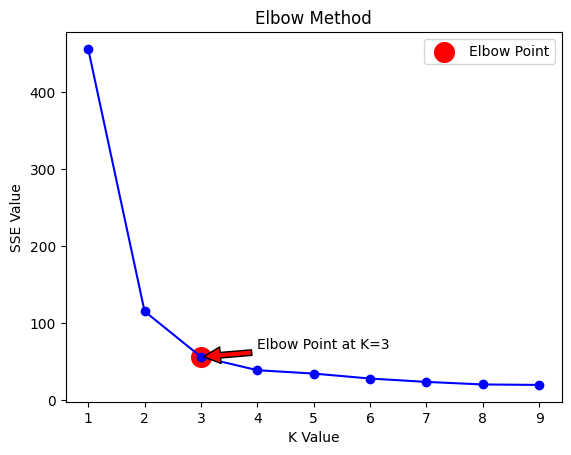

In [10]:
# 定义一个空列表来存储每个 K 值对应的 SSE（簇内平方误差和）
SSE = []

# 尝试不同的 K 值，计算每个 K 值下的 SSE
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit_transform(X_train)
    SSE.append(kmeans.inertia_)  # inertia_ 即 SSE

# 绘制 K 值与 SSE 的关系图
plt.plot(K_range, SSE, marker='o', color='blue')
plt.xlabel('K Value')
plt.ylabel('SSE Value')
plt.title('Elbow Method')

# 手动标注肘部点（K=3）
elbow_point = 3
plt.scatter(elbow_point, SSE[elbow_point-1], color='red', marker='o', s=200, label='Elbow Point')  # 标注肘部点
plt.legend()

# 在肘部点添加注释
plt.annotate(f'Elbow Point at K={elbow_point}', 
             xy=(elbow_point, SSE[elbow_point-1]), 
             xytext=(elbow_point+1, SSE[elbow_point-1]+10),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()
